<a href="https://colab.research.google.com/github/abdulmukit98/Tensorflow-in-practice-specialization/blob/master/Introduction_to_TensorFlow_for_Artificial_Intelligence%2C_Machine_Learning%2C_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# A New Programming Paradigm
    

In [0]:
!pip install tensorflow==2.0.0-alpha0

In [0]:
import tensorflow as tf

#simpliest neural network that has 1 layer and 1 neuron
model = tf.keras.Sequential([
                          tf.keras.layers.Dense(units=1,
                                                input_shape=[1])
])

model.compile(optimizer='sgd',  #stochastic gradient descent
              loss='mean_squared_error')

In [0]:
#providing the data
import numpy as np

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0],
              dtype = float)

ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0],
              dtype = float)

In [0]:
#Training the neural network
model.fit(xs, ys, epochs=1000, verbose=2)

In [0]:
#predict
print(model.predict([10]))  
#result appear in probability , not certainity


# Introduction to Computer Vision

In [0]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [0]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9


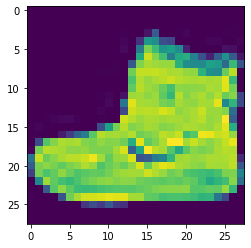

In [0]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])

In [0]:
#initially all value are 0-255 
#its easier if we normalized them 0-1

training_images = training_images / 255.0
test_images = test_labels / 255.0

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation= 'relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
                             ])
#Flatten convert sq image to linear
#relu, if X>0 return X, else return 0

#softmax take a set of value. Effectively take biggest one

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

In [0]:
model.evaluate(test_images, test_labels)

## Exercise 1


---


a set of classification for the test image.

In [0]:
classification = model.predict(test_images)
print(classification[5556])

## Exercise 2
---
Different value of Dense layer with 1024 neuron



In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation= 'relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classification = model.predict(test_images)

print(classification[0])
print(test_labels[0])

By using 1024 neuron 


*   training take longer but more accurate

## Exercise 3


---
What happen we remove flatten

What happen we take 5 neuron at final layer


In [0]:
import tensorflow as tf
print(tf.__version__)

mnist= tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                 tf.keras.layers.Dense(64,activation='relu'),
                 tf.keras.layers.Dense(15,activation='softmax')                   
                                    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images,test_labels)

classification = model.predict(test_images)

print(classification[0])
print(test_labels[0])

## Exercise 5
Add additional layer beween 512 neuron and 10 neuron layer.

---

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation='relu'),
                                   tf.keras.layers.Dense(256, activation='relu'),
                                   tf.keras.layers.Dense(10, activation='softmax')
                                   ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

## Exercise 6 

consider effect of changingg more or less epochs



In [0]:
import tensorflow as tf
print(tf.__version__)

mnist= tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels)= mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
                                     tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=30)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[34])
print(test_labels[34])


## Exercise 7 Callback
whatt happen if you use callback

---

In [0]:
import tensorflow as tf

class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
    if(logs.get('acc')>0.6):
      print('\n Reacher 60% acuracy so cancelling training')
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

callbacks = mycallback()

model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

# Enhancing Vision with Convolutional Neural Network


In [0]:
import tensorflow as tf
print(tf.__version__)

class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
    if(logs.get('acc')>0.6):
      print('\n Reacher 60% acuracy so cancelling training')
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_train=x_train/255.0

x_test = x_test.reshape(10000,28,28,1)
x_test = x_test/255.0

callbacks = mycallback()


model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128,(3,3),activation='relu',
                         input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,epochs=5, callbacks=[callbacks])
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_acc)

Visualizing convolution and pooling

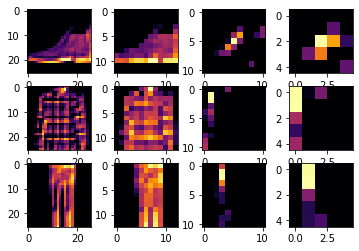

In [0]:
import matplotlib.pyplot as plt
f,axarr=plt.subplots(3,4)

First_Image = 0
Second_Image = 7
Third_Image = 15
Convolution_number=1

from tensorflow.keras import models
layer_outputs = [ layer.output for layer in model.layers ]

activation_model = models.Model(inputs = model.input,
                                outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(
      x_test[First_Image].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0, :, :, Convolution_number], cmap='inferno')

  f2 = activation_model.predict(
      x_test[Second_Image].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0, :, :, Convolution_number], cmap='inferno')

  f3 = activation_model.predict(
      x_test[Third_Image].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0, :, :, Convolution_number], cmap='inferno')


## Convolution and Maxpolling details
---
Convlution`

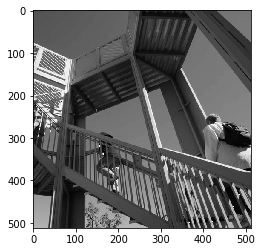

In [0]:
import cv2
import numpy as np
from scipy import misc

i = misc.ascent()
import matplotlib.pyplot as plt
plt.imshow(i)

#make matrix of i
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
weight  = 1



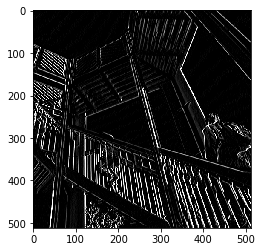

In [0]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    conv = 0.0
    conv = conv + (i[x-1,y-1] * filter[0][0])
    conv = conv + (i[x,y-1] * filter[0][1])
    conv = conv + (i[x+1,y-1] * filter[0][2])
    conv = conv + (i[x-1,y] * filter[1][0])
    conv = conv + (i[x,y] * filter[1][1])
    conv = conv + (i[x+1,y] * filter[1][2])
    conv = conv + (i[x-1,y+1] * filter[2][0])
    conv = conv + (i[x,y+1] * filter[2][1])
    conv = conv + (i[x+1,y+1] * filter[2][2])
    conv = conv * weight

    if(conv<0):
      conv=0
    if(conv>255):
      conv=255

    i_transformed[x,y] = conv  #revalue img


#show image
plt.imshow(i_transformed)


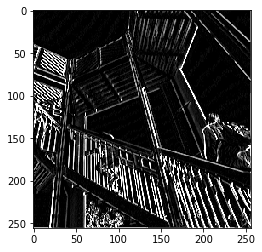

In [0]:
#Maxpooling

new_x = int(size_x/2)
new_y = int(size_y/2)
#make new zero matrix
newImage = np.zeros((new_x,new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    #new array of 4 value
    pixels = []
    pixels.append(i_transformed[x,y])
    pixels.append(i_transformed[x+1,y])
    pixels.append(i_transformed[x,y+1])
    pixels.append(i_transformed[x+1,y+1])
    
    newImage[int(x/2)][int(y/2)] = max(pixels)


plt.imshow(newImage)
    

# Using Real World Images

Train Datasets

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

Validation datasets

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

In [0]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
train_horse_dir=os.path.join('/tmp/horse-or-human/horses')
train_human_dir=os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [0]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

print('total training horse images: ',len(train_horse_names))
print('total training human images: ',len(train_human_names))

['horse40-2.png', 'horse42-6.png', 'horse24-8.png', 'horse31-2.png', 'horse07-5.png', 'horse14-2.png', 'horse50-5.png', 'horse24-1.png', 'horse43-3.png', 'horse18-6.png']
['human05-16.png', 'human04-05.png', 'human08-04.png', 'human01-14.png', 'human12-01.png', 'human13-19.png', 'human09-21.png', 'human04-16.png', 'human14-20.png', 'human13-15.png']
total training horse images:  500
total training human images:  527


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols *4, nrows*4)


<Figure size 1152x1152 with 0 Axes>

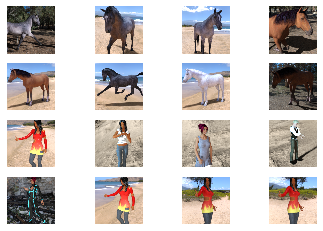

In [0]:
pic_index +=8

next_horse_pix = [os.path.join(train_horse_dir,fname)
for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix = [os.path.join(train_human_dir,fname)
for fname in train_human_names[pic_index-8:pic_index]]

for  i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a small model from scratch

In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu',
      input_shape=(300,300,3)),
      
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),  
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'    
)

Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8
)

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] >0.5:
    print(fn+" is a human")
  else:
    print(fn+" is a horse")



Saving white-horse-3010129_1920.jpg to white-horse-3010129_1920 (1).jpg
[0.]
white-horse-3010129_1920.jpg is a horse
